In [1]:
%pylab inline
from pandas import *
from scipy.stats import ttest_ind, pearsonr, skew, skewnorm

from numpy import polyfit, round

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
satellite_asteroids = read_csv('satellite_asteroids.csv')
main_belt = concat([read_csv('main_belt_final.csv'), read_csv('main_belt_2_5.csv'), read_csv('main_belt_2_8.csv')])
inner_main_belt = read_csv('inner_main_belt.csv')
outer_main_belt = read_csv('outer_main_belt.csv')
outer_asteroids = read_csv('outer_system.csv')
inner_asteroids = read_csv('inner_system.csv')

temp = [main_belt, outer_main_belt, inner_main_belt, inner_asteroids, outer_asteroids]

asteroids = concat(temp, axis=0)
asteroids.reset_index()

,index,a,e,i,w,q,ad,per.y,H,diameter,albedo,rot_per
0,0,3.142,0.1116,3.83,312.49,2.791,3.49,5.57,5.60,407.120,0.0717,13.8280
1,1,2.924,0.1339,3.10,229.22,2.533,3.32,5.00,6.14,226.000,0.1203,4.1960
2,2,2.910,0.0984,13.70,357.60,2.624,3.20,4.96,6.63,167.536,0.1660,4.1483
3,3,3.142,0.1224,0.75,107.60,2.758,3.53,5.57,7.25,198.000,0.0670,8.3740
4,4,3.164,0.2179,26.28,61.56,2.475,3.85,5.63,6.86,267.080,0.0530,5.5300
...,...,...,...,...,...,...,...,...,...,...,...,...
1205163,16810,43.670,0.1174,9.48,167.66,38.545,48.80,289.00,8.13,NaN,NaN,NaN
1205164,16811,5.404,0.0380,35.71,90.37,5.199,5.61,12.60,15.13,NaN,NaN,NaN
1205165,16812,113.400,0.6494,13.69,14.72,39.745,186.98,1210.00,8.28,NaN,NaN,NaN
1205166,16813,43.610,0.0659,2.05,74.64,40.741,46.48,288.00,7.11,NaN,NaN,NaN


In [3]:
bool_index = notnull(asteroids.H)
mag_asteroids = asteroids[bool_index]

R =  -0.23062187454368901 p = 0.0


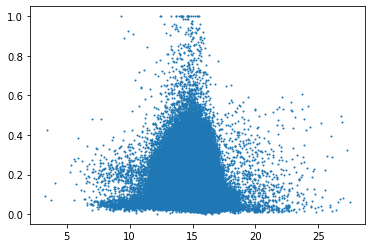

In [4]:
#first, we'll look at whether albedo is correlated with magnitude
#albedo is also not correlated with semi-major axis

bool_index = notnull(asteroids.albedo)
alb_asteroids = asteroids[bool_index]

plot(alb_asteroids.H, alb_asteroids.albedo, 'o', ms=1)

bool_index = notnull(alb_asteroids.H)
alb_asteroids = alb_asteroids[bool_index]

R, p = pearsonr(alb_asteroids.albedo, alb_asteroids.H)
print('R = ', R, 'p =', p)

0.1305430281608195

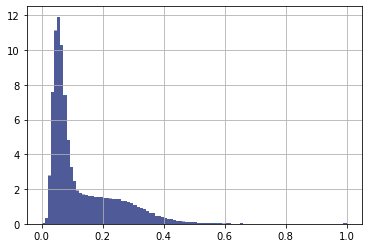

In [5]:
from numpy.random import randint
n = len(alb_asteroids)

random_idx = randint(n,size=len(mag_asteroids))
rand_alb = array(alb_asteroids.albedo)[random_idx]

#the two histograms overlap perfectly
hist(rand_alb, bins=100, density=True)
alb_asteroids.albedo.hist(bins=100, density=True, color=(0.5, 0.25, 0.5, 0.5))

mean(alb_asteroids.albedo)

In [6]:
mag_asteroids['calc_diam'] = 10.**(3.1236 - (0.5*log10((rand_alb[mag_asteroids.H.index]))) - (0.2 * mag_asteroids.H))

/var/folders/w5/p8_d6hbs5x57tjj9tbpczy9c0000gn/T/ipykernel_627/42891803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mag_asteroids['calc_diam'] = 10.**(3.1236 - (0.5*log10((rand_alb[mag_asteroids.H.index]))) - (0.2 * mag_asteroids.H))


In [7]:
ascending = mag_asteroids.sort_values(by=['a'])
ascending = ascending.reset_index()

ascending_sat = satellite_asteroids.sort_values(by=['a'])
ascending_sat = ascending_sat.reset_index()


In [ ]:
pop_req = 100

dist_groups = []
diam_groups = []
sat_dist_groups = []
sat_diam_groups = []

#give a "normalized" running median by only placing points after a certain number of "population required" asteroids have been indexed
for j in range(len(ascending)):
    if j % pop_req == 0:
        valid_asteroids = ascending[ascending.index < j]
        dist_groups.append(valid_asteroids[valid_asteroids.index > j-pop_req].a.median())
        diam_groups.append(valid_asteroids[valid_asteroids.index > j-pop_req].calc_diam.median())

print('Done!')


In [ ]:
valid_asteroids1 = mag_asteroids[mag_asteroids.a > 1.8]
valid_asteroids1 = valid_asteroids1[valid_asteroids1.a < 2.4]
valid_asteroids2 = mag_asteroids[mag_asteroids.a > 2.4]
valid_asteroids2 = valid_asteroids2[valid_asteroids2.a < 2.6]
valid_asteroids3 = mag_asteroids[mag_asteroids.a > 2.8]
valid_asteroids3 = valid_asteroids3[valid_asteroids3.a < 2.84]

dst_grp_1 = []
for i in range(len(dist_groups)):
    if dist_groups[i] > 1.8 and dist_groups[i] < 2.4:
        dst_grp_1.append(True)
    else:
        dst_grp_1.append(False)

diam_grp_1 = array(diam_groups)[dst_grp_1]
dst_grp_1 = array(dist_groups)[dst_grp_1]

dst_grp_2 = []
for i in range(len(dist_groups)):
    if dist_groups[i] > 2.4 and dist_groups[i] < 2.6:
        dst_grp_2.append(True)
    else:
        dst_grp_2.append(False)

diam_grp_2 = array(diam_groups)[dst_grp_2]
dst_grp_2 = array(dist_groups)[dst_grp_2]

dst_grp_3 = []
for i in range(len(dist_groups)):
    if dist_groups[i] > 2.8 and dist_groups[i] < 2.84:
        dst_grp_3.append(True)
    else:
        dst_grp_3.append(False)

diam_grp_3 = array(diam_groups)[dst_grp_3]
dst_grp_3 = array(dist_groups)[dst_grp_3]

#Here are the histograms of the particularly small asteroids vs all the rest

small1 = valid_asteroids1[valid_asteroids1.a < 2.125]
small1 = small1[small1.a > 2.]

small2 = valid_asteroids2[valid_asteroids2.a < 2.515]
small2 = small2[small2.a > 2.492]

small3 = valid_asteroids3[valid_asteroids3.a < 2.827]
small3 = small3[small3.a > 2.819]

for i in range(len(valid_asteroids1)):
    if valid_asteroids1.index[i] == small1.index.any:
        index = valid_asteroids1.index[i]
        valid_asteroids1.drop(index)

for i in range(len(valid_asteroids2)):
      if valid_asteroids2.index[i] == small2.index.any:
        index = valid_asteroids2.index[i]
        valid_asteroids2.drop(index)


for i in range(len(valid_asteroids3)):
     if valid_asteroids3.index[i] == small3.index.any:
        index = valid_asteroids3.index[i]
        valid_asteroids3.drop(index)

In [ ]:
fig = figure(figsize=(20, 20))

ax = fig.add_subplot(3, 2, 1)
semilogy(valid_asteroids1.a, valid_asteroids1.calc_diam, 'o', ms=1)
plot(dst_grp_1, diam_grp_1)
plot([2.125, 2.125], [0, 1000])
plot([2., 2.], [0, 1000])
#xlabel('Semimajor axis (au)')
#ylabel('Diameter (km)')


ax = fig.add_subplot(3, 2, 3)
semilogy(valid_asteroids2.a, valid_asteroids2.calc_diam, 'o', ms=1)
plot(dst_grp_2, diam_grp_2)
plot([2.492, 2.492], [0, 300])
plot([2.515, 2.515], [0, 300])
#xlabel('Semimajor axis (au)')
#ylabel('Diameter (km)')


ax = fig.add_subplot(3, 2, 5)
semilogy(valid_asteroids3.a, valid_asteroids3.calc_diam, 'o', ms=1)
plot(dst_grp_3, diam_grp_3)
plot([2.819, 2.819], [0, 200])
plot([2.827, 2.827], [0, 200])
#xlabel('Semimajor axis (au)')
#ylabel('Diameter (km)')

#hist 1
ax = fig.add_subplot(3, 2, 2)
hist(valid_asteroids1.calc_diam, density=True, bins=10000)
hist(small1.calc_diam, density=True, bins=100, fc=(0, 1., 0.1, 0.5))
ax.set_xlim(0,5)
#xlabel('Diameter (km)')
#ylabel('Probability Density')

arr_small1 = array(small1)
arr_valid1 = array(valid_asteroids1)
t, p = ttest_ind(arr_small1, arr_valid1)
text = 'p =' + str(round(p, 4))
ax.text(2,1.5,text)


#hist 2
ax = fig.add_subplot(3, 2, 4)
hist(valid_asteroids2.calc_diam, density=True, bins=10000)
hist(small2.calc_diam, density=True, bins=1000, fc=(0, 1., 0.1, 0.5))
ax.set_xlim(0, 5)

arr_small12 = array(small2)
arr_valid2 = array(valid_asteroids2)
t, p = ttest_ind(arr_small2, arr_valid2)

text = 'p =' + str(round(p, 4))
ax.text(2,1.5,text)
#xlabel('Diameter (km)')
#ylabel('Probability Density')

#hist 3
ax = fig.add_subplot(3, 2, 6)
hist(valid_asteroids3.calc_diam, density=True, bins=5000)
hist(small3.calc_diam, density=True, bins=50, fc=(0, 1., 0.1, 0.5))

ax.set_xlim(0, 5)
arr_small13 = array(small3)
arr_valid3 = array(valid_asteroids3)
t, p = ttest_ind(arr_small3, arr_valid3)
text = 'p =' + str(round(p, 4))
ax.text(2,1.5,text)
#xlabel('Diameter (km)')
#ylabel('Probability Density')

fig.savefig('diam-plots')
#Semimajor axis of index 0 is 1.7787924478251473
#Semimajor axis of index 1 is 1.9082280286576032
#Semimajor axis of index 2 is 2.064105790784986
#Semimajor axis of index 3 is 2.500486092146311
#Semimajor axis of index 4 is 2.8236570029107275
#Semimajor axis of index 5 is 2.9565649424259464
#Semimajor axis of index 6 is 3.2765637036657393